Project Objective: 


Choose to Long / Short the given underlying assets, ETFs with options, based on the past Rolling Windows ranked returns, modified through RSI.
<br>
</br>
Mentor: Jackson Xing
<br>
</br>
Author: Howard Li

***

## Imports

In [32]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
from ta.momentum import rsi
import pyodbc
import quantstats as qs
from Rolling_Functions_Final import * 

-

-

-

## Testing RSI Strategy on 5 underlying ETFs with option

- Set up 

In [33]:
list_of_codes = ['510050', '510300', '159915','159901', '588000']
window_list = [21]
data = Rolling.get_data(list_of_codes)
_data1 = data.copy()
_data2 = data.copy()

Here at starting from the longest period


- Before RSI 

In [34]:
data_table = Rolling.single_window_table(_data1, [21], len(list_of_codes))
print(f'''Stats for the Staretgy Before Applying RSI\n\n
      Duration: {str(data_table.index[0])[:10]} to {str(data_table.index[-1])[:10]}\n
      Final Return: {round(data_table.loc[:, "signal_return_21"][-1],3)}\n
      Sharpe: {round(Test.get_Sharpe(data_table, "signal_return_21"),3)}\n
      Total Position Change: {CountingPosition.position_change_cal(data_table)}''')

The total position change has occured 4502 times.
Stats for the Staretgy Before Applying RSI


      Duration: 2005-03-11 to 2023-08-09

      Final Return: 2323.134

      Sharpe: 0.747

      Total Position Change: 4502


- After RSI

In [35]:
data_table_RSI = RSI_Strategy.RSI(_data2, [21], len(list_of_codes))
print(f'''Stats for the Staretgy After Applying RSI\n\n
      Duration: {str(data_table_RSI.index[0])[:10]} to {str(data_table_RSI.index[-1])[:10]}\n
      Final Return: {round(data_table_RSI.loc[:, "signal_return_21"][-1],3)}\n
      Sharpe: {round(Test.get_Sharpe(data_table_RSI, "signal_return_21"),3)}\n
      Total Position Change: {CountingPosition.position_change_cal(data_table_RSI)}''')

The total position change has occured 4502 times.
Stats for the Staretgy After Applying RSI


      Duration: 2005-03-11 to 2023-08-09

      Final Return: 2407.776

      Sharpe: 0.758

      Total Position Change: 4502


- Conclusion 

<h5>Through trials on timeframe 2005-03-11 to 2023-07-04, </h5>






1. we found on the set combination of  '510050', '510300', '159915', '159901', and '588000'  the RSI improves the results from the original strategy:




- OG: Return: 2269.224, Sharpe: 0.745
- <font color = 'green'> RSI: Return: 2351.902, Sharpe: 0.756 </font>



2. However, on the set combination of '510050', '510300', '159915', '510500', '159901', and '588000' the RSI fails to outperform the original strategy:




- OG: Return: 1836.796, Sharpe: 0.704
- <font color = 'red'> RSI: Return: 1675.538, Sharpe: 0.69 </font>



——————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————

-

-

-

## - 

## - 

## - 

## Testing Long Short Strategy on 6 underlying ETFs with option

- Set up

In [36]:
list_of_codes = ['510050', '510300', '159915', '159901', '588000', '510500']
window_list = [21]
data = Rolling.get_data(list_of_codes)
data_2016 = data.iloc[2666:,:]

Here at starting from the longest period


- Without RSI

In [37]:
OPT_table = OPT.opt_strat_table(data_2016, window_list, len(list_of_codes))
OG_table = Rolling.single_window_table(data_2016, window_list, len(list_of_codes))

- With RSI (70 for overbought, 30 for oversold)

In [38]:
data_2016 = data.iloc[2666:,:]
RSI_OPT_table = OPT.OPT_RSI(data_2016, [21], len(list_of_codes), 70, 40)

- Attempt feedback from heatmap

In [39]:
data_2016 = data.iloc[2666:,:]
RSI_OPT_table_best = OPT.OPT_RSI(data_2016, [12], len(list_of_codes), 60, 30)

#### Summary

In [40]:
data_2016['etf_510050_return'] = data_2016['etf_510050']*(100/data_2016.loc[:,"etf_510050"][0])
data_2016['etf_510300_return'] = data_2016['etf_510300']*(100/data_2016.loc[:,"etf_510300"][0])
data_2016['etf_159915_return'] = data_2016['etf_159915']*(100/data_2016.loc[:,"etf_159915"][0])
data_2016['etf_159901_return'] = data_2016['etf_159901']*(100/data_2016.loc[:,"etf_159901"][0])
data_2016['etf_510500_return'] = data_2016['etf_510500']*(100/data_2016.loc[:,"etf_510500"][0])
data_2016['etf_588000_return'] = data_2016['etf_588000']*(100/data_2016.loc[:,"etf_588000"][1192])

In [41]:
result = pd.DataFrame()
result['etf_510050_return'] = data_2016['etf_510050_return'] 
result['etf_510300_return'] = data_2016['etf_510300_return']
result['etf_159915_return'] = data_2016['etf_159915_return']
result['etf_159901_return'] = data_2016['etf_159901_return']
result['etf_510500_return'] = data_2016['etf_510500_return']
result['etf_588000_return'] = data_2016['etf_588000_return'] 
result['OG_Signal (No Sell Short)'] = OG_table["signal_return_21"]
result['New_Signal (Include Sell Short)'] = OPT_table["signal_return_21"]
result['New_Signal (Short + RSI)'] = RSI_OPT_table["signal_return_21"]
result['New_Signal (best)'] = RSI_OPT_table_best["signal_return_12"]

In [42]:
Sharpe_510050 = Test.get_Sharpe(result, 'etf_510050_return')
Sharpe_510300 = Test.get_Sharpe(result, 'etf_510300_return')
Sharpe_159915 = Test.get_Sharpe(result, 'etf_159915_return')
Sharpe_159901 = Test.get_Sharpe(result, 'etf_159901_return')
Sharpe_510500 = Test.get_Sharpe(result, 'etf_510500_return')
Sharpe_588000 = Test.get_Sharpe(result, 'etf_588000_return')
Sharpe_OG = Test.get_Sharpe(result, 'OG_Signal (No Sell Short)')
Sharpe_New = Test.get_Sharpe(result, 'New_Signal (Include Sell Short)')
Sharpe_New_RSI = Test.get_Sharpe(result, 'New_Signal (Short + RSI)')
Sharpe_New_Best = Test.get_Sharpe(result, 'New_Signal (best)')

In [43]:
New_Sig = round(OPT_table.loc[:,"signal_return_21"][-1],2)
print(f'1. Given The New Signal WITHOUT RSI has a return of {New_Sig}% in 7 years, we can approximately calculate the strategy produces an estimated return of {round(np.power(New_Sig/100,1/7)*100-100,2)}% per year along with a Sharpe of {round(Sharpe_New,3)}\n')

New_Sig_RSI = round(RSI_OPT_table.loc[:,'signal_return_21'][-1],2)
print(f'2. Given The New Signal WITH RSI has a return of {New_Sig_RSI}% in 7 years, we can approximately calculate the strategy produces an estimated return of {round(np.power(New_Sig_RSI/100,1/7)*100-100,2)}% per year along with a Sharpe of {round(Sharpe_New_RSI,3)}\n')

New_Sig_Best = round(RSI_OPT_table_best.loc[:,'signal_return_12'][-1],2)
print(f'2. Given The Best Signal here has a return of {New_Sig_Best}% in 7 years, we can approximately calculate the strategy produces an estimated return of {round(np.power(New_Sig_Best/100,1/7)*100-100,2)}% per year along with a Sharpe of {round(Sharpe_New_Best,3)}')

1. Given The New Signal WITHOUT RSI has a return of 364.06% in 7 years, we can approximately calculate the strategy produces an estimated return of 20.27% per year along with a Sharpe of 1.014

2. Given The New Signal WITH RSI has a return of 291.06% in 7 years, we can approximately calculate the strategy produces an estimated return of 16.49% per year along with a Sharpe of 0.937

2. Given The Best Signal here has a return of 521.46% in 7 years, we can approximately calculate the strategy produces an estimated return of 26.61% per year along with a Sharpe of 1.503


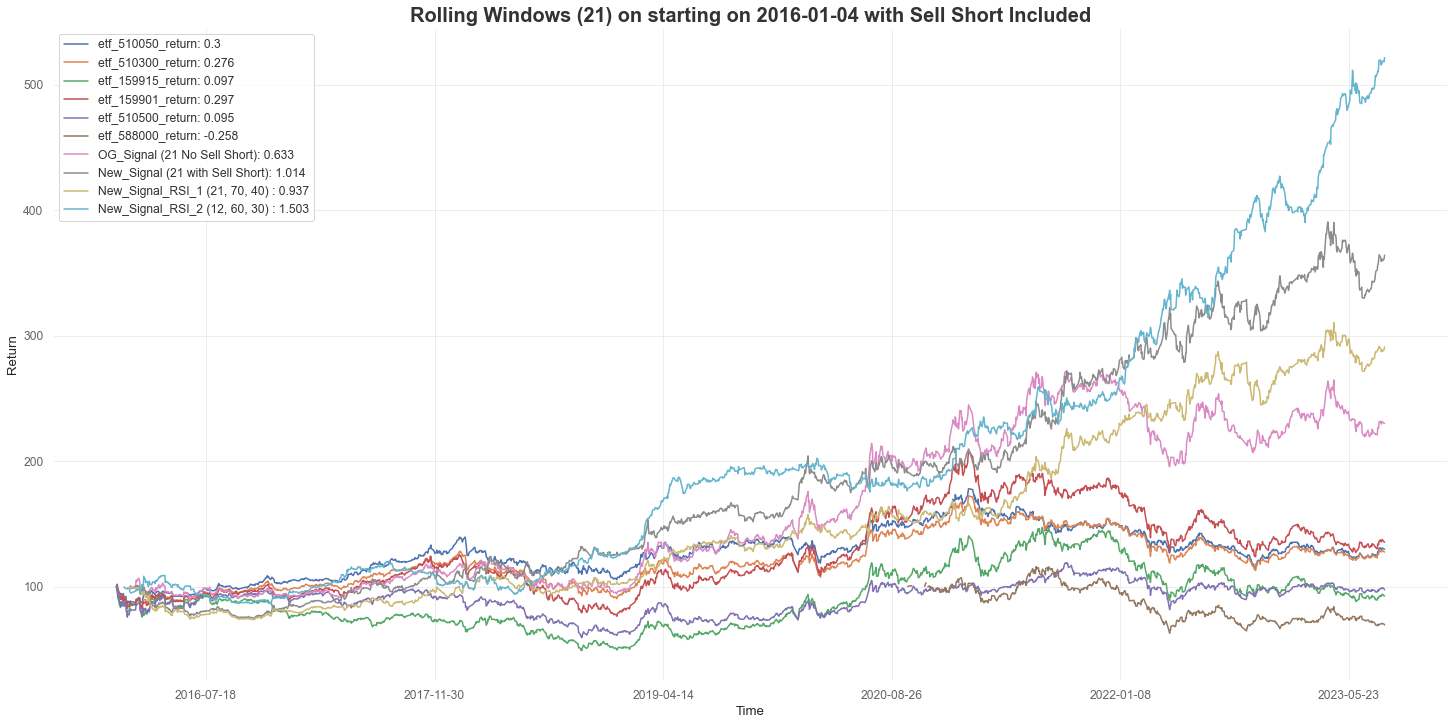

In [98]:
_ = plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(data_2016['etf_510050_return'].index),data_2016['etf_510050_return'].values)
_ = plt.plot(np.array(data_2016['etf_510300_return'].index),data_2016['etf_510300_return'] .values)
_ = plt.plot(np.array(data_2016['etf_159915_return'].index),data_2016['etf_159915_return'].values)
_ = plt.plot(np.array(data_2016['etf_159901_return'].index),data_2016['etf_159901_return'].values)
_ = plt.plot(np.array(data_2016['etf_510500_return'].index),data_2016['etf_510500_return'].values)
_ = plt.plot(np.array(data_2016['etf_588000_return'].index),data_2016['etf_588000_return'].values)




_ = plt.plot(np.array(OG_table["signal_return_21"].index),OG_table["signal_return_21"].values)
_ = plt.plot(np.array(OPT_table["signal_return_21"].index),OPT_table["signal_return_21"].values)
_ = plt.plot(np.array(RSI_OPT_table["signal_return_21"].index),RSI_OPT_table["signal_return_21"].values)
_ = plt.plot(np.array(RSI_OPT_table_best["signal_return_12"].index),RSI_OPT_table_best["signal_return_12"].values)


_ = plt.legend([f'etf_510050_return: {round(Sharpe_510050, 3)}', f'etf_510300_return: {round(Sharpe_510300, 3)}', 
                f'etf_159915_return: {round(Sharpe_159915, 3)}', f'etf_159901_return: {round(Sharpe_159901, 3)}',
                f'etf_510500_return: {round(Sharpe_510500, 3)}', f'etf_588000_return: {round(Sharpe_588000, 3)}',
                f"OG_Signal (21 No Sell Short): {round(Sharpe_OG, 3)}", f"New_Signal (21 with Sell Short): {round(Sharpe_New, 3)}", 
                f"New_Signal_RSI_1 (21, 70, 40) : {round(Sharpe_New_RSI, 3)}", f"New_Signal_RSI_2 (12, 60, 30) : {round(Sharpe_New_Best, 3)}"]) 


# _ = plt.legend([f'etf_510050_return: {round(Sharpe_510050, 3)}', f'etf_510300_return: {round(Sharpe_510300, 3)}', 
#                 f'etf_159915_return: {round(Sharpe_159915, 3)}', f'etf_159901_return: {round(Sharpe_159901, 3)}',
#                 f'etf_510500_return: {round(Sharpe_510500, 3)}', f'etf_588000_return: {round(Sharpe_588000, 3)}',
#                 f"OG_Signal (21 No Sell Short): {round(Sharpe_OG, 3)}", f"New_Signal (21 with Sell Short): {round(Sharpe_New, 3)}"]) 
                
plt.title('Rolling Windows (21) on starting on 2016-01-04 with Sell Short Included', fontsize=20, fontweight='bold')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(500))

In [131]:
OG_table

,etf_510050,etf_510300,etf_159915,etf_159901,etf_588000,etf_510500,etf_510050_day_return,etf_510300_day_return,etf_159915_day_return,etf_159901_day_return,...,signal_510300,signal_159915,signal_159901,signal_588000,signal_510500,signal_return_21,arr,Previous_Peak,Drawdown,position_change
EndDate,,,,,,,,,,,,,,,,,,,,,
2016-02-03,2.660,1.1538,2.2764,3.6196,NaN,1.6278,-0.007463,-0.004057,0.007034,-0.000856,...,0.0,0.0,0.0,0.0,0.0,100.000000,0.992537,100.000000,0.000000,0.0
2016-02-04,2.685,1.1672,2.3170,3.6565,NaN,1.6603,0.009398,0.011614,0.017835,0.010194,...,0.0,0.0,0.0,0.0,0.0,100.939850,1.009398,100.939850,0.000000,0.0
2016-02-05,2.677,1.1594,2.2829,3.6105,NaN,1.6437,-0.002980,-0.006683,-0.014717,-0.012580,...,0.0,1.0,0.0,0.0,0.0,99.454287,0.985283,100.939850,-0.014717,2.0
2016-02-15,2.654,1.1529,2.3056,3.5962,NaN,1.6447,-0.008592,-0.005606,0.009943,-0.003961,...,0.0,1.0,0.0,0.0,0.0,100.443210,1.009943,100.939850,-0.004920,0.0
2016-02-16,2.716,1.1864,2.4036,3.7132,NaN,1.7126,0.023361,0.029057,0.042505,0.032534,...,0.0,1.0,0.0,0.0,0.0,104.712569,1.042505,104.712569,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-03,3.962,1.7342,2.5049,5.7197,0.7047,1.9933,0.007374,0.007611,0.010529,0.007823,...,0.0,0.0,0.0,0.0,0.0,231.208367,1.007374,272.189433,-0.150561,0.0
2023-08-04,3.967,1.7402,2.5288,5.7533,0.7086,2.0035,0.001262,0.003460,0.009541,0.005874,...,0.0,0.0,0.0,0.0,0.0,231.500149,1.001262,272.189433,-0.149489,0.0
2023-08-07,3.949,1.7286,2.5035,5.6923,0.7035,1.9914,-0.004537,-0.006666,-0.010005,-0.010603,...,0.0,0.0,0.0,0.0,0.0,230.449732,0.995463,272.189433,-0.153348,0.0


In [130]:
RSI_OPT_table_best

,etf_510050,etf_510300,etf_159915,etf_159901,etf_588000,etf_510500,etf_510050_day_return,etf_510300_day_return,etf_159915_day_return,etf_159901_day_return,...,signal_510300,signal_159915,signal_159901,signal_588000,signal_510500,signal_return_12,arr,Previous_Peak,Drawdown,position_change
EndDate,,,,,,,,,,,,,,,,,,,,,
2016-01-21,2.767,1.2031,2.2989,3.7112,NaN,1.7031,-0.019490,-0.027955,-0.041566,-0.032937,...,0.0,0.0,0.0,0.0,-1.0,100.000000,1.020314,100.000000,0.000000,0.0
2016-01-22,2.790,1.2150,2.3392,3.7550,NaN,1.7310,0.008312,0.009891,0.017530,0.011802,...,0.0,0.0,0.0,0.0,-1.0,99.193036,0.991930,100.000000,-0.008070,0.0
2016-01-25,2.795,1.2207,2.3493,3.7783,NaN,1.7492,0.001792,0.004691,0.004318,0.006205,...,0.0,1.0,0.0,0.0,-1.0,98.578392,0.993804,100.000000,-0.014216,2.0
2016-01-26,2.662,1.1507,2.1697,3.5525,NaN,1.6200,-0.047585,-0.057344,-0.076448,-0.059762,...,0.0,1.0,0.0,0.0,-1.0,98.323472,0.997414,100.000000,-0.016765,0.0
2016-01-27,2.664,1.1469,2.1734,3.5503,NaN,1.5984,0.000751,-0.003302,0.001705,-0.000619,...,0.0,0.0,0.0,0.0,0.0,98.323472,1.000000,100.000000,-0.016765,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-03,3.962,1.7342,2.5049,5.7197,0.7047,1.9933,0.007374,0.007611,0.010529,0.007823,...,0.0,0.0,0.0,-1.0,1.0,516.486847,1.001483,519.651105,-0.006089,2.0
2023-08-04,3.967,1.7402,2.5288,5.7533,0.7086,2.0035,0.001262,0.003460,0.009541,0.005874,...,0.0,1.0,0.0,-1.0,0.0,518.556425,1.004007,519.651105,-0.002107,2.0
2023-08-07,3.949,1.7286,2.5035,5.6923,0.7035,1.9914,-0.004537,-0.006666,-0.010005,-0.010603,...,0.0,0.0,0.0,0.0,0.0,518.556425,1.000000,519.651105,-0.002107,2.0


In [129]:
RSI_OPT_table_best['Previous_Peak'] = RSI_OPT_table_best['signal_return_12'].cummax()
RSI_OPT_table_best['Drawdown'] = RSI_OPT_table_best['signal_return_12'] / RSI_OPT_table_best['Previous_Peak'] - 1
max_drawdown = round(RSI_OPT_table_best['Drawdown'].min(),4)
max_drawdown

-0.2179

In [116]:
521.46  - 110

411.46000000000004

In [53]:
test = Rolling.get_index_data('000300')
test.set_index('TradingDay', inplace=True)
test = test.sort_index()

df_000300 = pd.DataFrame(index=test.index)

df_000300['close'] = test['ClosePrice']
df_000300['prev_close'] = test['PrevClosePrice']
df_000300 = df_000300.iloc[len(df_000300)-len(data_table):,:]
df_000300['daily_return'] = (df_000300['close']-df_000300['prev_close'])/df_000300['prev_close']


df_000300['000300_return'] = np.cumprod(df_000300['daily_return']+1, axis=0)*100
df_000300['000300_return'] = df_000300['000300_return']/df_000300['000300_return'][0]*100

In [61]:
df_000300 = df_000300.iloc[-len(OG_table)-12:,:]
df_000300['000300_return'] = df_000300['000300_return']/df_000300['000300_return'][0]*100
df_000300

,close,prev_close,daily_return,000300_return
TradingDay,,,,
2016-01-04,3469.0662,3731.0047,-0.070206,100.000000
2016-01-05,3478.7797,3469.0662,0.002800,100.280003
2016-01-06,3539.8082,3478.7797,0.017543,102.039223
2016-01-07,3294.3839,3539.8082,-0.069333,94.964573
2016-01-08,3361.5632,3294.3839,0.020392,96.901097
...,...,...,...,...
2023-08-03,4004.9839,3969.8950,0.008839,115.448471
2023-08-04,4020.5792,4004.9839,0.003894,115.898025
2023-08-07,3990.1531,4020.5792,-0.007568,115.020956


In [118]:
annualized_return = round(np.power(RSI_OPT_table_best['signal_return_12'][-1]/100,365/len(RSI_OPT_table_best))*100-100,2)
print(f"Annualized Return: {round(annualized_return, 2)}%")

Annualized Return: 38.62%


In [66]:
annualized_return = round(np.power(OG_table['signal_return_21'][-1]/100,365/len(OG_table))*100-100,2)
print(f"Annualized Return: {round(annualized_return, 2)}%")

Annualized Return: 18.0%


In [65]:
annualized_return = round(np.power(df_000300['000300_return'][-1]/100,365/len(df_000300))*100-100,2)
print(f"Annualized Return: {round(annualized_return, 2)}%")

Annualized Return: 2.69%


In [125]:
sum(RSI_OPT_table_best['arr']>=1)/len(RSI_OPT_table)

0.5792052259118128

In [119]:
RSI_OPT_table_best.columns[-10:-4]

Index(['signal_510050', 'signal_510300', 'signal_159915', 'signal_159901',
       'signal_588000', 'signal_510500'],
      dtype='object')

In [120]:
position_count_df = RSI_OPT_table_best.iloc[:,-10:-4]

In [121]:
RSI_OPT_table_best['position_change'] = position_count_df.diff().abs().sum(axis=1)

In [122]:
RSI_OPT_table_best['position_change'].sum()

2614.0

In [123]:
2614/len(RSI_OPT_table_best)*365

516.8526543878656

In [124]:
annualized_volatility = np.sqrt(252) * RSI_OPT_table_best['arr'].std()
print(f'Annualized Volatility: {round(annualized_volatility,2)}')

Annualized Volatility: 0.16


In [89]:
df_000300

,close,prev_close,daily_return,000300_return
TradingDay,,,,
2016-01-04,3469.0662,3731.0047,-0.070206,100.000000
2016-01-05,3478.7797,3469.0662,0.002800,100.280003
2016-01-06,3539.8082,3478.7797,0.017543,102.039223
2016-01-07,3294.3839,3539.8082,-0.069333,94.964573
2016-01-08,3361.5632,3294.3839,0.020392,96.901097
...,...,...,...,...
2023-08-03,4004.9839,3969.8950,0.008839,115.448471
2023-08-04,4020.5792,4004.9839,0.003894,115.898025
2023-08-07,3990.1531,4020.5792,-0.007568,115.020956


In [93]:
(223-117)/117

0.905982905982906

In [128]:
38.62-2.69

35.93

## -

## -

## -

## Heatmap

#### Setting up

In [16]:
## Setting up
import seaborn as sns

def draw_heatmap(df, output_name, x_labels, y_labels, vmin=None, vmax=None):
    plt.figure(figsize=(20,15))
    plt.title(output_name)

    x_labels = x_labels
    y_labels = y_labels
    sns.heatmap(data=df, cmap=sns.diverging_palette(220, 10, sep=1, n=10), annot=True, fmt=".2f", vmin=vmin, vmax=vmax, xticklabels=x_labels, yticklabels=y_labels)
    plt.show()



def create_heatmap(long_window_list, long_RSI_list, output_name, requirement=None):
    """
    :param long_window_list: The list of windows want to be tested, X-axis
    :param long_RSI_list: [21]
    :param output_name: Title of the Graph in form of str
    :param requirement: 1. None, will produce Sharpe Map; 2. Long Count, will produce Long Count per year; 
                        3. Short Count, will produce Short Count per year; 4. Total Count, will produce Total Count per year
    :return: data_list
    """
    # Initialize the heatmap DataFrame
    heatmap_df = pd.DataFrame(index=long_RSI_list, columns=long_window_list)
    heatmap_df.index = heatmap_df.index.astype(str)

    ## Fill the heatmap Dataframe
    data_2016 = data.iloc[2666:,:] # Correct format should be 1836 rows × 12 columns

    if requirement == "Long":
        print('Now we are producing Long Counts per year Heatmap\n')
        for window in long_window_list:
            for RSI_combo in long_RSI_list:
                Long_Count, Short_Count = OPT.OPT_Position_Count(data_2016, [window], len(list_of_codes), RSI_combo[0], RSI_combo[1])
                # print(RSI_OPT_table)
                Long_Count = round(Long_Count/len(data_2016)*250)
                heatmap_df.loc[f'{RSI_combo[0], RSI_combo[1]}', window] = Long_Count

    if requirement == 'Short':
        print('Now we are producing Short Counts per year Heatmap\n')
        for window in long_window_list:
            for RSI_combo in long_RSI_list:
                Long_Count, Short_Count = OPT.OPT_Position_Count(data_2016, [window], len(list_of_codes), RSI_combo[0], RSI_combo[1])
                # print(RSI_OPT_table)
                Short_Count = round(Short_Count/len(data_2016)*250)
                # print(f'The Sharpe for {(RSI_combo[0], RSI_combo[1])} and {window} is {Sharpe}')
                heatmap_df.loc[f'{RSI_combo[0], RSI_combo[1]}', window] = Short_Count


    if requirement == 'Total':
        print('Now we are producing Total Counts per year Heatmap\n')
        for window in long_window_list:
            for RSI_combo in long_RSI_list:
                Long_Count, Short_Count = OPT.OPT_Position_Count(data_2016, [window], len(list_of_codes), RSI_combo[0], RSI_combo[1])
                # print(RSI_OPT_table)
                Total_Count = Long_Count + Short_Count
                Total_Count = round(Total_Count/len(data_2016)*250)
                # print(f'The Sharpe for {(RSI_combo[0], RSI_combo[1])} and {window} is {Sharpe}')
                heatmap_df.loc[f'{RSI_combo[0], RSI_combo[1]}', window] = Total_Count
            
    if requirement is None:
        print('Now we are producing Sharpe Heatmap\n')
        for window in long_window_list:
            for RSI_combo in long_RSI_list:
                RSI_OPT_table = OPT.OPT_RSI(data_2016, [window], len(list_of_codes), RSI_combo[0], RSI_combo[1])
                # print(RSI_OPT_table)
                Sharpe = round(Test.get_Sharpe(RSI_OPT_table, f'signal_return_{window}'),4)
                # print(f'The Sharpe for {(RSI_combo[0], RSI_combo[1])} and {window} is {Sharpe}')
                heatmap_df.loc[f'{RSI_combo[0], RSI_combo[1]}', window] = Sharpe
    
    # Convert the DataFrame Copy into compatible format to fit into heatmap

    heatmap_df_copy = heatmap_df.copy()
    heatmap_df_copy.reset_index(inplace=True)
    heatmap_df_copy.index = pd.to_numeric(heatmap_df_copy.index)
    heatmap_df_copy.columns = pd.to_numeric(heatmap_df_copy.columns, errors='coerce')
    heatmap_df_copy.drop(heatmap_df_copy.columns[0], axis=1, inplace=True)
    for column in heatmap_df_copy.columns:
        heatmap_df_copy[column] = pd.to_numeric(heatmap_df_copy[column], errors='coerce')
    draw_heatmap(heatmap_df_copy, output_name, [str(x) for x in long_window_list], [str(y) for y in long_RSI_list])

#### Initial Attempts on Heatmap

###### *Be aware below function can take upto 7 min to proccess

Now we are producing Sharpe Heatmap



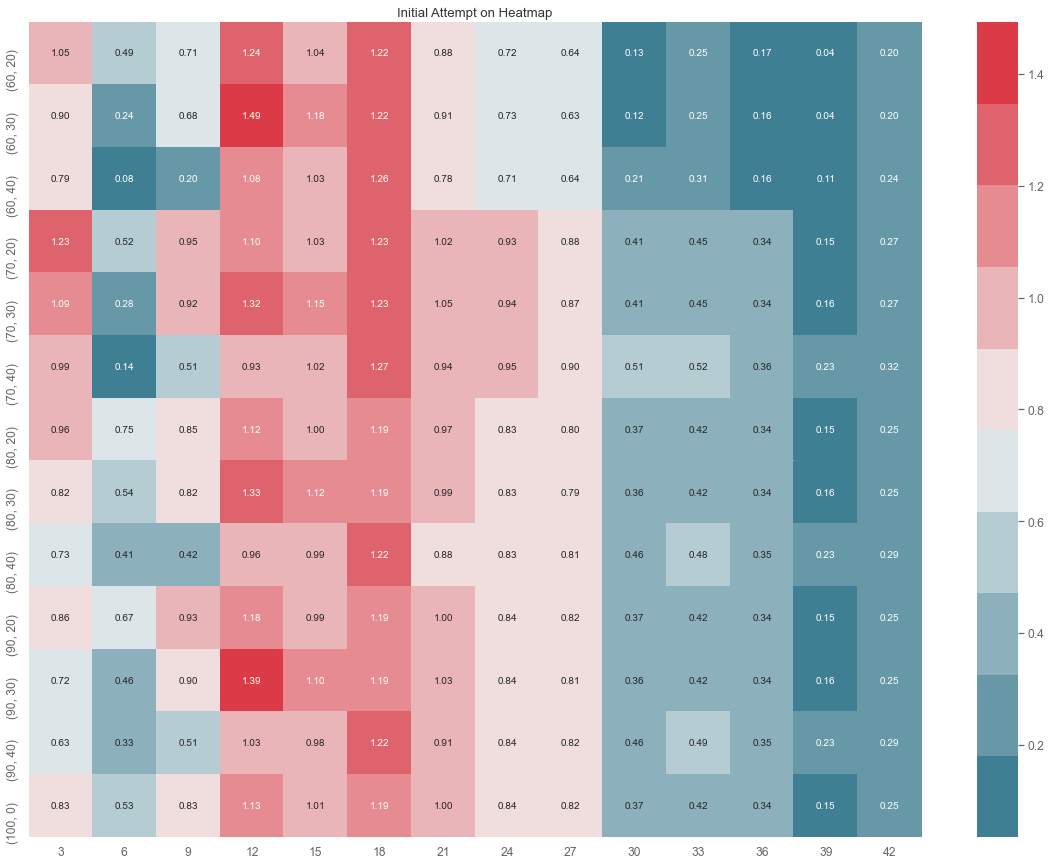

In [17]:
long_window_list = [3,6,9,12,15,18,21,24,27,30,33,36,39,42]
long_RSI_list = [(60,20), (60,30), (60,40), (70,20), (70,30), (70,40), (80,20), (80,30),(80,40),(90,20),(90,30),(90,40), (100,0)]
output_name = 'Initial Attempt on Heatmap'

create_heatmap(long_window_list, long_RSI_list, output_name)

#### Smaller Granularity 1.0

Now we are producing Sharpe Heatmap



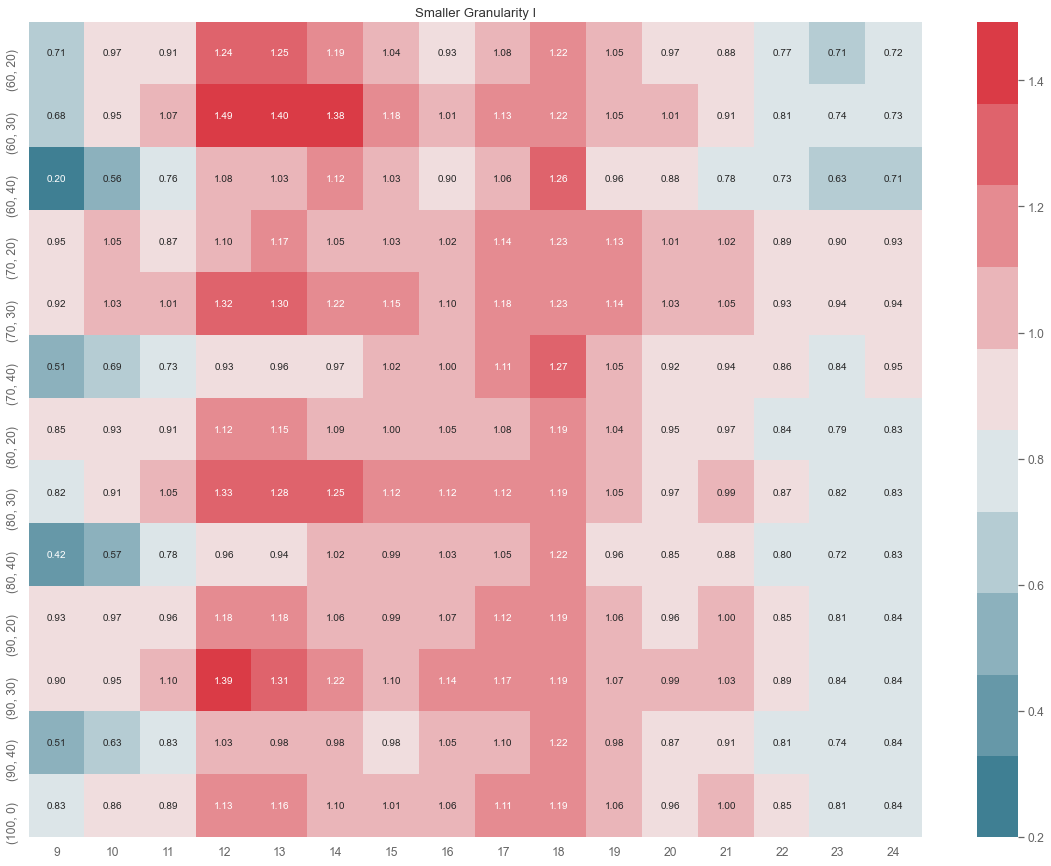

In [18]:
long_window_list = [9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
long_RSI_list = [(60,20), (60,30), (60,40), (70,20), (70,30), (70,40), (80,20), (80,30),(80,40),(90,20),(90,30),(90,40), (100,0)]
output_name = 'Smaller Granularity I'

create_heatmap(long_window_list, long_RSI_list, output_name)


#### Smaller Granularity 2.0

Now we are producing Sharpe Heatmap



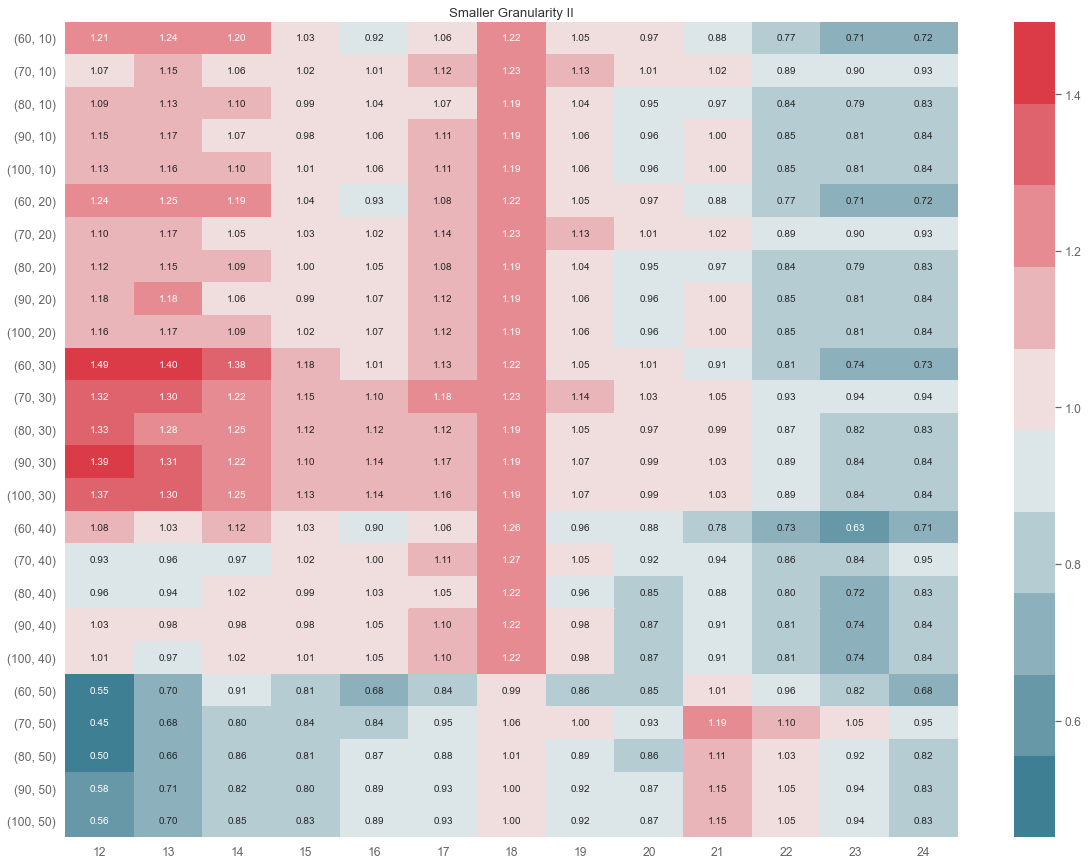

In [19]:
long_window_list = [12,13,14,15,16,17,18,19,20,21,22,23,24]
long_RSI_list = [(60,10), (70,10), (80,10), (90,10), (100,10),
                 (60,20), (70,20), (80,20), (90,20), (100,20),
                 (60,30), (70,30), (80,30), (90,30), (100,30),
                 (60,40), (70,40), (80,40), (90,40), (100,40),
                 (60,50), (70,50), (80,50), (90,50), (100,50)]
output_name = 'Smaller Granularity II'


create_heatmap(long_window_list, long_RSI_list, output_name)

#### Smaller Granularity 3.0

Now we are producing Sharpe Heatmap



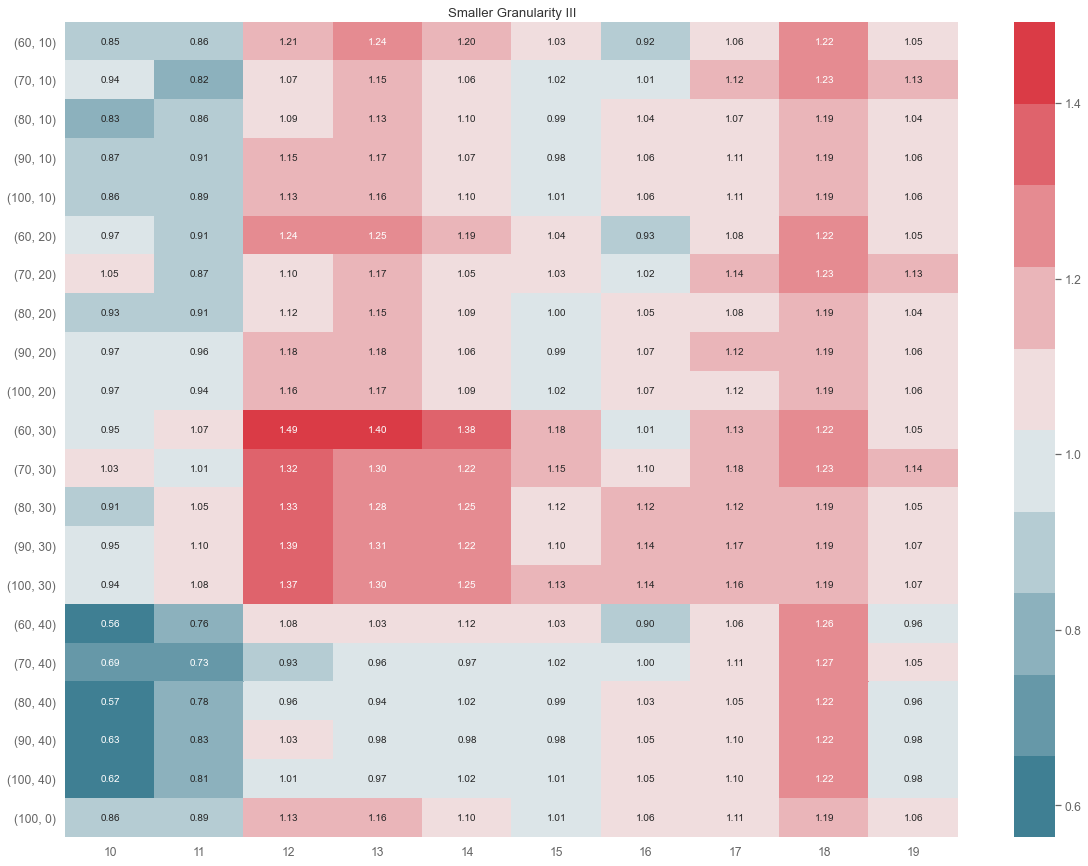

In [20]:
long_window_list = [10,11,12,13,14,15, 16, 17, 18, 19]
long_RSI_list = [(60,10), (70,10), (80,10), (90,10), (100,10),
                 (60,20), (70,20), (80,20), (90,20), (100,20),
                 (60,30), (70,30), (80,30), (90,30), (100,30),
                 (60,40), (70,40), (80,40), (90,40), (100,40), (100,0)]
output_name = "Smaller Granularity III"


create_heatmap(long_window_list, long_RSI_list, output_name)

#### Smaller Granularity 4.0

Now we are producing Sharpe Heatmap



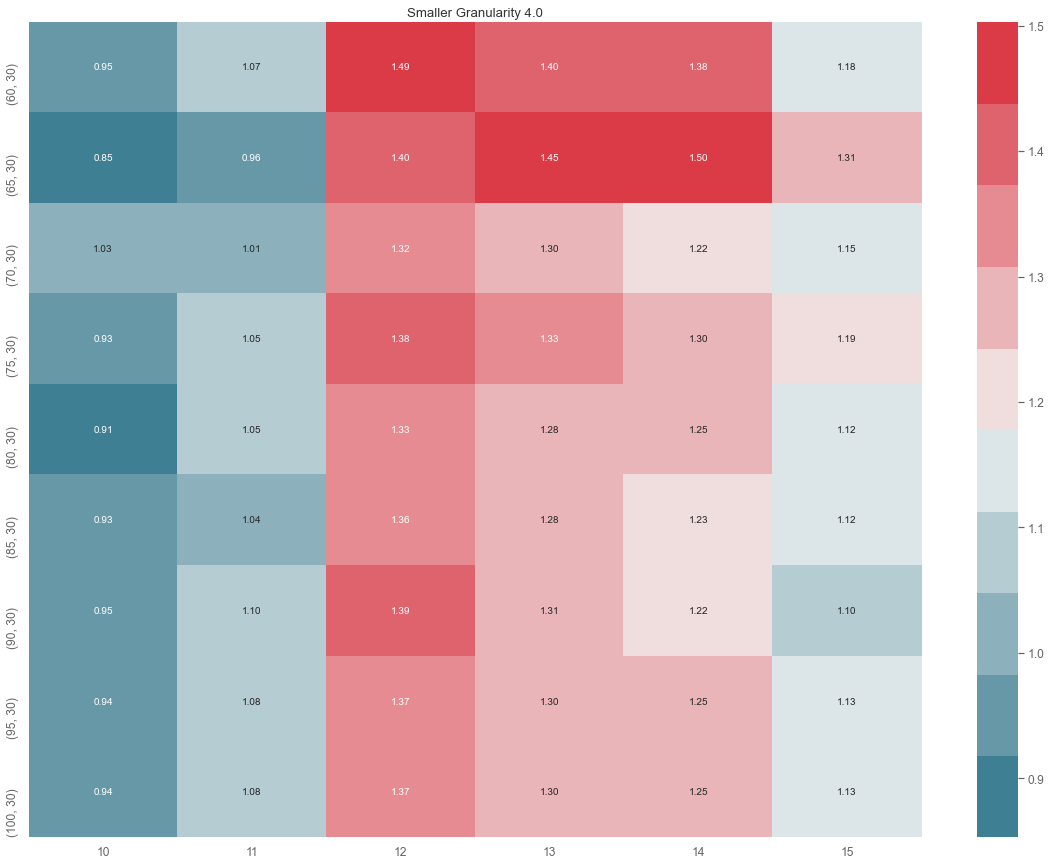

In [21]:
long_window_list = [10,11,12,13,14,15]
long_RSI_list = [(60,30), (65,30), (70,30), (75,30), (80,30), (85,30), (90,30), (95,30), (100,30)]
output_name = "Smaller Granularity 4.0"


create_heatmap(long_window_list, long_RSI_list, output_name)

##### Summary: 
<br>
 As we observe from the Heatmap, the final narrowed Heatmap has X-axis of (10-15) and Y-axis of (RSI Upper:60-100 with 5 interval and RSI Lower: 30 fixed)
<br>

 The window size of 12 presents the best performance along with the lower bar of RSI = 30. For the upper RSI limit, it seems the RSI does not matter as much, any value in between 60 and 100 can be taken into considerations. 

## - 

## - 

## -

## Check Errors for days are not hedged （only one execution）

In [22]:
def error_day_report(RSI_OPT_table_best):
    """
        :param RSI_OPT_table_best: DataFrame 

        :return: printed results in str
        """
        # parameter type: DataFrame

    error = 0
    error_row_collector = []
    for row in range(len(RSI_OPT_table_best)):
        if RSI_OPT_table_best.iloc[:,3*len(list_of_codes):-2].iloc[row,:].sum() != 0:
            print(f"On {RSI_OPT_table_best.index[row]}, the {row}th row, only one move is executed and the move is {RSI_OPT_table_best.iloc[:,3*len(list_of_codes):-2].iloc[row,:].sum()}")
            error += 1
            error_row_collector.append(row)
    print("\n")
    print("____________________________________________________________________________")
    print(f"The total number of rows had errors are {error}")
    return error_row_collector
    

In [23]:
data_2016 = data.iloc[2666:,:]
RSI_OPT_table_best = OPT.OPT_RSI(data_2016, [12], len(list_of_codes), 60, 30)

error_row_collector = error_day_report(RSI_OPT_table_best)



____________________________________________________________________________
The total number of rows had errors are 0


## - 

## - 

## - 

## Counting Postion Changes 


#### Setting up

In [24]:
list_of_codes = ['510050', '510300', '159915', '159901', '588000', '510500']
window_list = [21]
data = Rolling.get_data(list_of_codes)
data_2016 = data.iloc[2666:,:]
Long_Count, Short_Count = OPT.OPT_Position_Count(data_2016, [12], len(list_of_codes), 60, 30)
Long_Count, Short_Count

Here at starting from the longest period


(785, 547)

#### Calculating Long Positions Changes....

Now we are producing Long Counts per year Heatmap



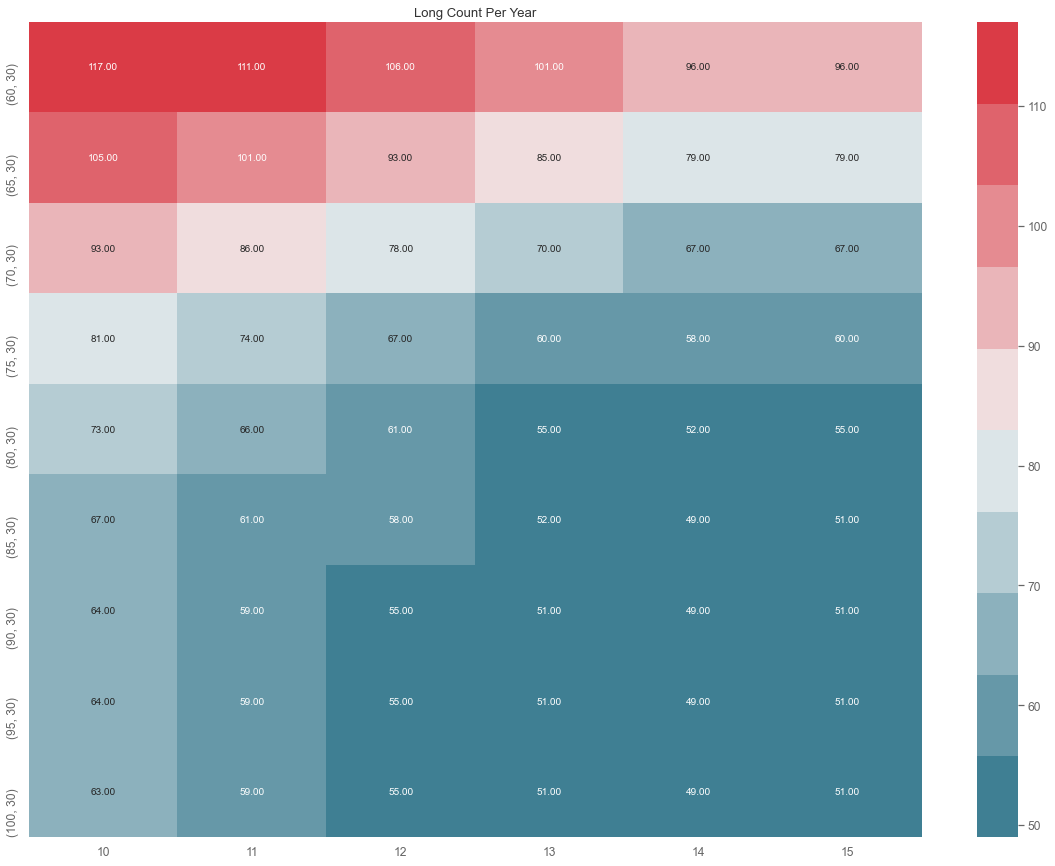

In [25]:
long_window_list = [10,11,12,13,14,15]
long_RSI_list = [(60,30), (65,30), (70,30), (75,30), (80,30), (85,30), (90,30), (95,30), (100,30)]
output_name = "Long Count Per Year"
requirement  = "Long"


create_heatmap(long_window_list, long_RSI_list, output_name, requirement)

#### Counting Short Positions Changes....

Now we are producing Short Counts per year Heatmap



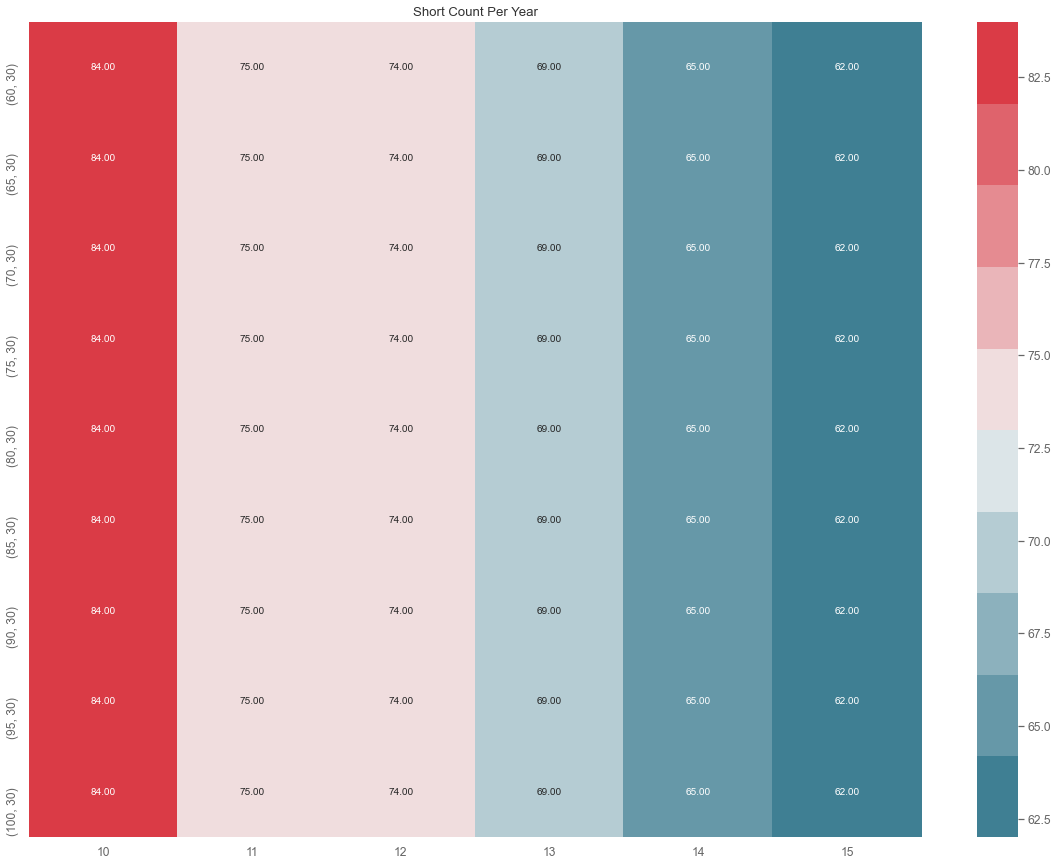

In [26]:
long_window_list = [10,11,12,13,14,15]
long_RSI_list = [(60,30), (65,30), (70,30), (75,30), (80,30), (85,30), (90,30), (95,30), (100,30)]
output_name = "Short Count Per Year"
requirement  = "Short"


create_heatmap(long_window_list, long_RSI_list, output_name, requirement)

#### Calculating Total Position Changes....

Now we are producing Total Counts per year Heatmap



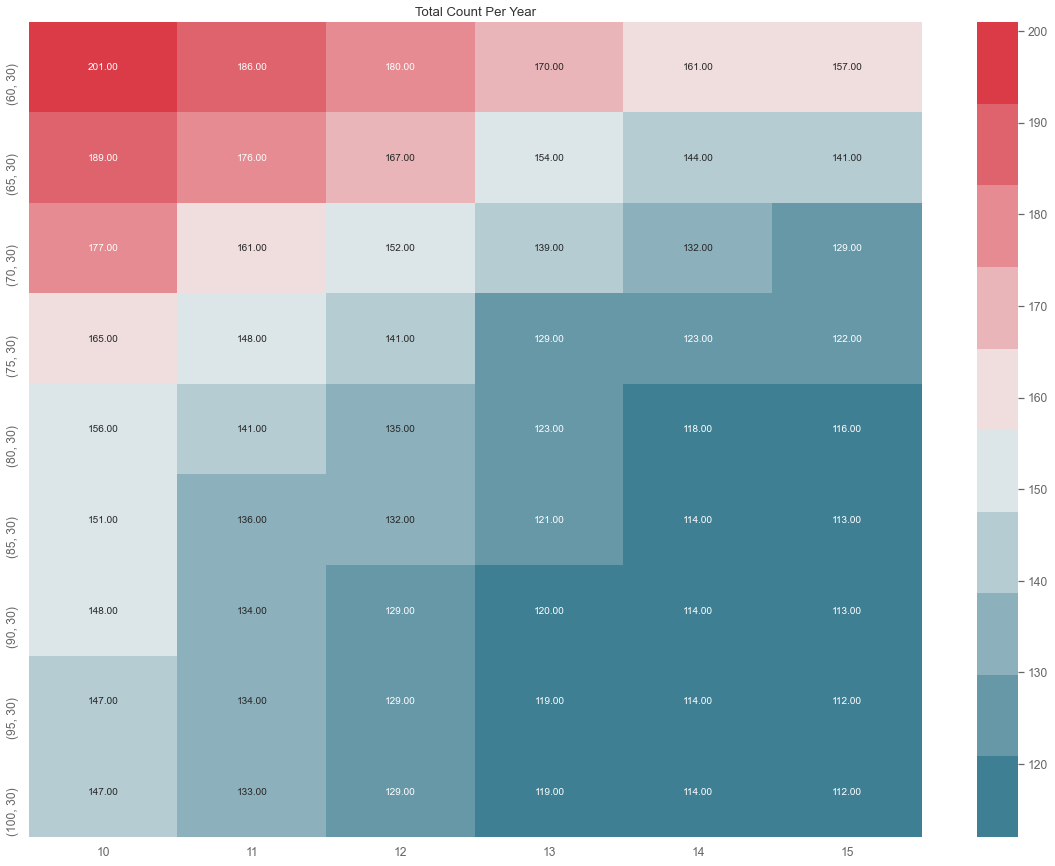

In [27]:
long_window_list = [10,11,12,13,14,15]
long_RSI_list = [(60,30), (65,30), (70,30), (75,30), (80,30), (85,30), (90,30), (95,30), (100,30)]
output_name = "Total Count Per Year"
requirement  = "Total"


create_heatmap(long_window_list, long_RSI_list, output_name, requirement)

## -

## - 

## -

#### ---------------------------------------- End of this Notebook (Last Edit on 7.25.2023) ---------------------------------------------------